In [34]:
! pip install yfinance

In [35]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
from datetime import datetime
end = datetime.now()
start_date = datetime(end.year-4,8,end.day-1)
end_date = datetime(end.year,8,end.day-1)
AMZN_data = fetch_stock_data('AMZN', start_date, end_date)
AMZN_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-12,89.799500,90.049004,88.849998,89.246002,89.246002,58110000
2019-08-13,89.150002,91.586998,89.000000,91.217003,91.217003,79880000
2019-08-14,89.650497,89.782501,87.861000,88.148003,88.148003,97872000
2019-08-15,89.099503,89.400002,88.098000,88.806000,88.806000,75182000
2019-08-16,89.644501,90.145500,89.227501,89.628502,89.628502,60360000
...,...,...,...,...,...,...
2023-08-07,140.990005,142.539993,138.949997,142.220001,142.220001,71213100
2023-08-08,140.619995,140.839996,138.419998,139.940002,139.940002,51710500
2023-08-09,139.970001,140.320007,137.100006,137.850006,137.850006,50017300


In [38]:
# Clean the data
AMZN_data= clean_data(AMZN_data)

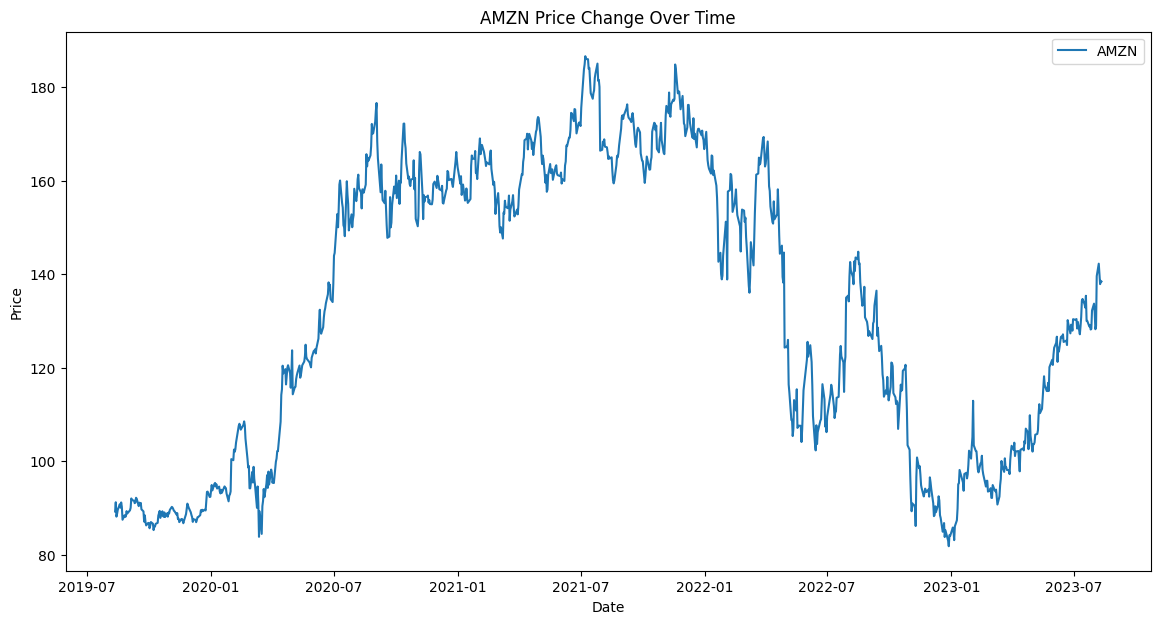

In [39]:
# Visualize stock price change
plt.figure(figsize=(14, 7))
plt.plot(AMZN_data.index, AMZN_data['Close'], label='AMZN')
plt.title('AMZN Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

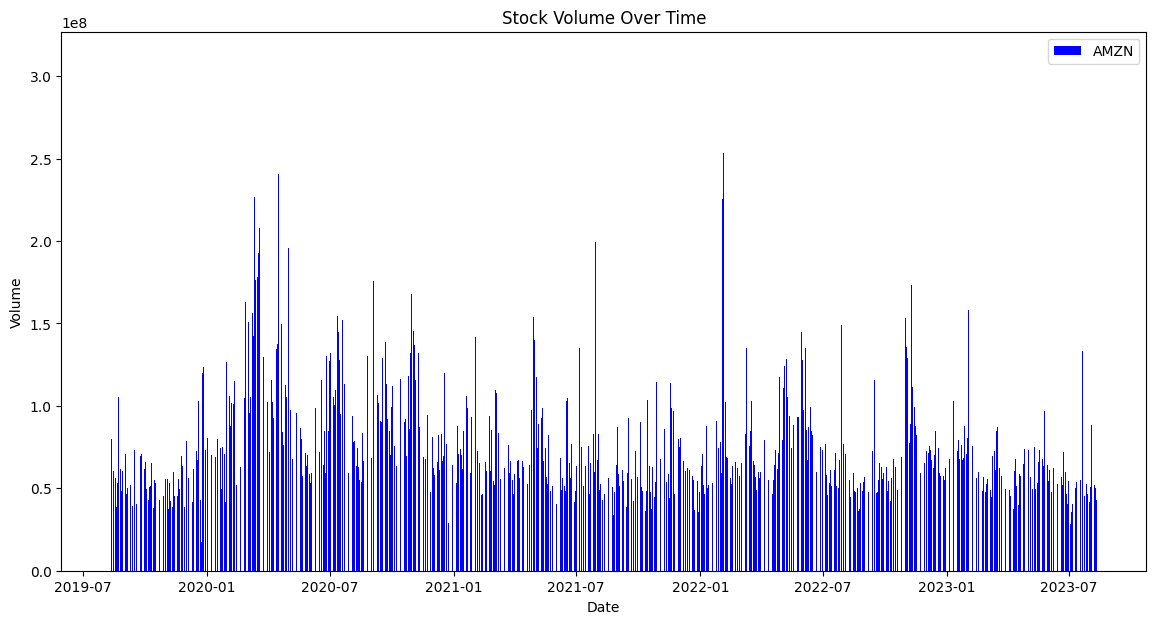

In [40]:
plt.figure(figsize=(14, 7))
plt.bar(AMZN_data.index, AMZN_data['Volume'], label='AMZN',color='blue')
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


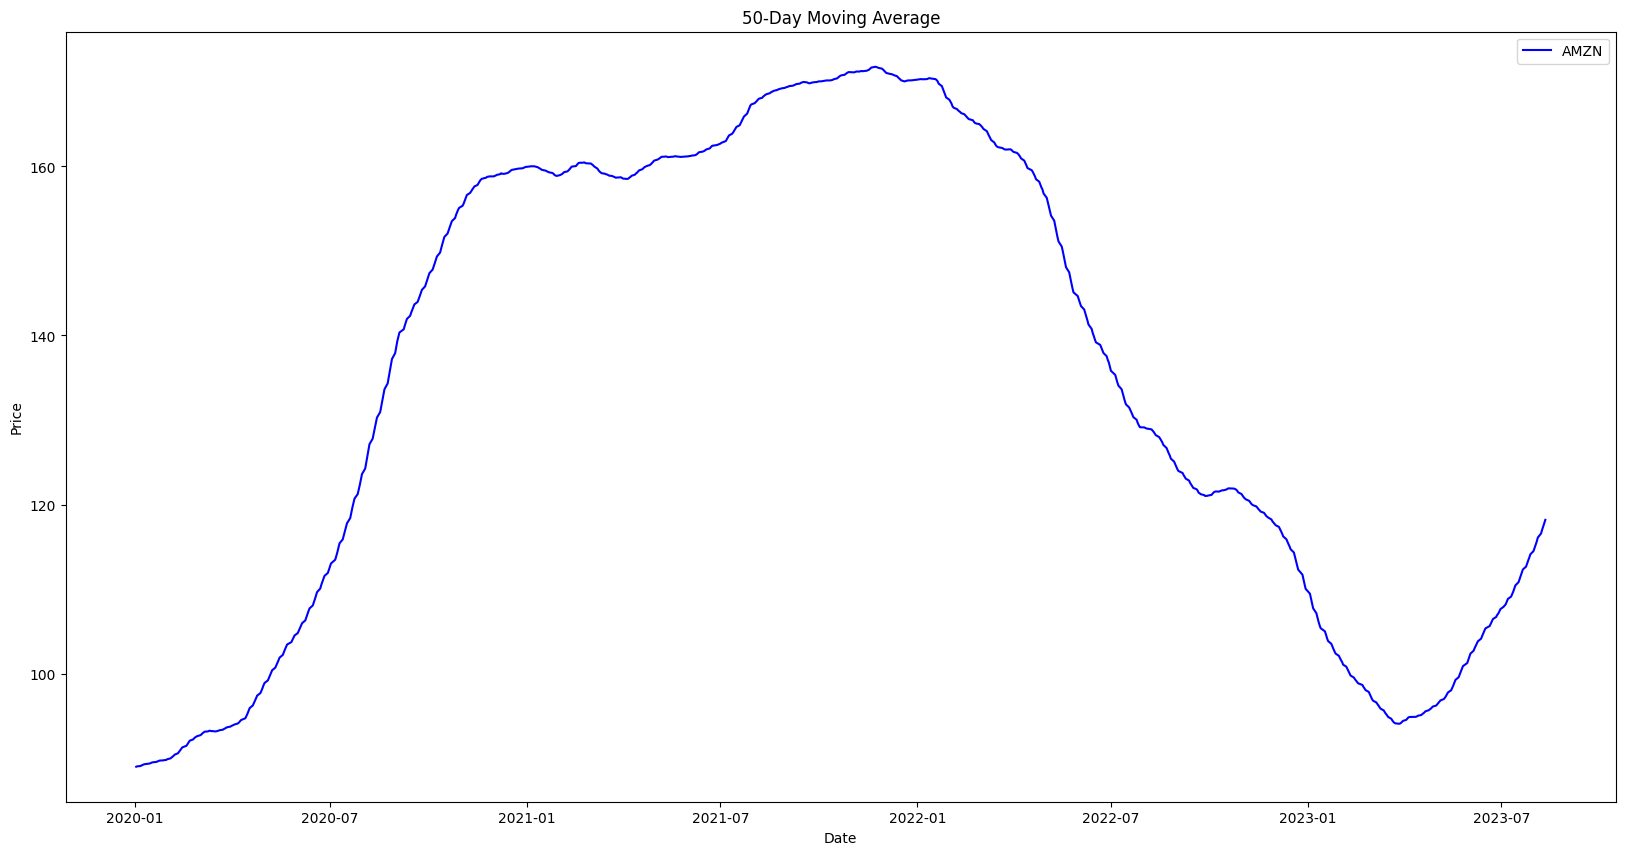

In [41]:
moving_avg = calculate_moving_average(AMZN_data, window=100)
plt.figure(figsize=(20, 10))
plt.plot(AMZN_data.index, moving_avg, label='AMZN',color='blue')
plt.title('50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [42]:
AMZN_avg_daily_return = calculate_daily_return(AMZN_data)
print('Average Daily Return:', AMZN_avg_daily_return)

Average Daily Return: 0.0007071649129690518


In [43]:
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
stock_data = fetch_stock_data(stocks, start_date, end_date)

[*********************100%***********************]  4 of 4 completed


In [44]:
stock_data.head(3)

Adj Close                                        Close             \
                 AAPL       AMZN      GOOGL        MSFT       AAPL       AMZN   
Date                                                                            
2019-08-12  48.746487  89.246002  58.724998  130.515396  50.119999  89.246002   
2019-08-13  50.810825  91.217003  59.836498  133.216248  52.242500  91.217003   
2019-08-14  49.298443  88.148003  58.212502  129.204529  50.687500  88.148003   

                                        High             ...        Low  \
                GOOGL        MSFT       AAPL       AMZN  ...      GOOGL   
Date                                                     ...              
2019-08-12  58.724998  135.789993  50.512501  90.049004  ...  58.436001   
2019-08-13  59.836498  138.600006  53.035000  91.586998  ...  58.649502   
2019-08-14  58.212502  133.979996  51.610001  89.782501  ...  58.053501   

                             Open                                    \
                  MSFT       AAPL       AMZN      GOOGL        MSFT   
Date                                                                  
2019-08-12  135.240005  49.904999  89.799500  59.000000  137.070007   
2019-08-13  135.000000  50.255001  89.150002  58.717499  136.050003   
2019-08-14  133.669998  50.790001  89.650497  58.803501  136.360001   

               Volume                                
                 AAPL      AMZN     GOOGL      MSFT  
Date                                                 
2019-08-12   89927600  58110000  22064000  20484300  
2019-08-13  188874000  79880000  28434000  25154600  
2019-08-14  146189600  97872000  35430000  32527300  

[3 rows x 24 columns]

In [45]:
# Clean the data
stock_data_cleaned = clean_data(stock_data)

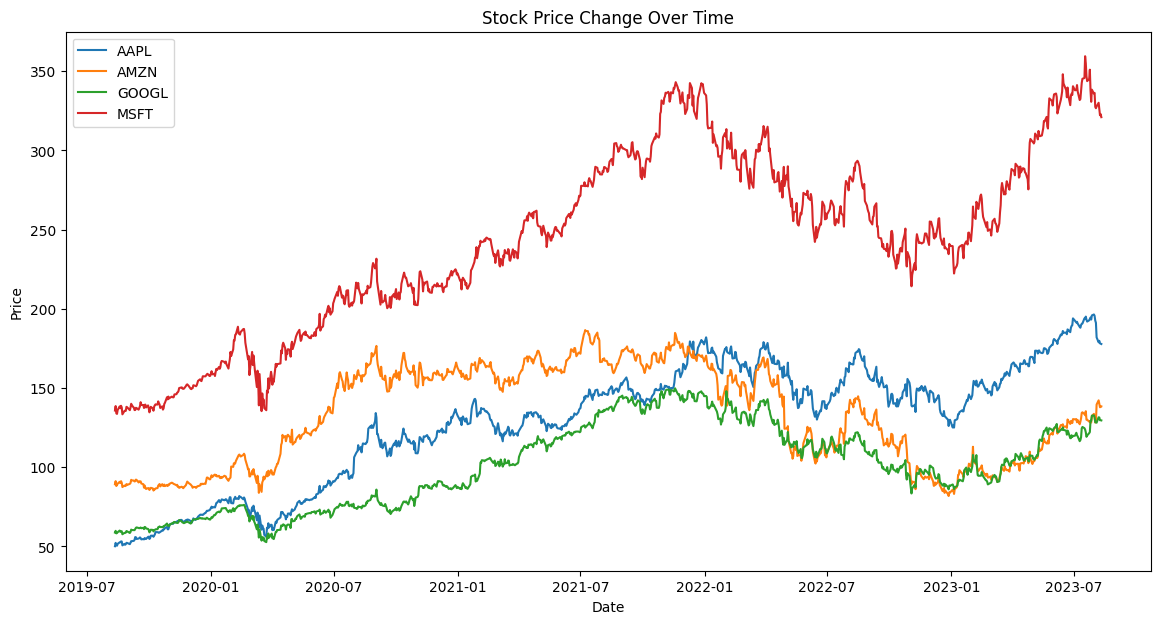

In [46]:

# Visualize stock price change
visualize_stock_price_change(stock_data_cleaned)

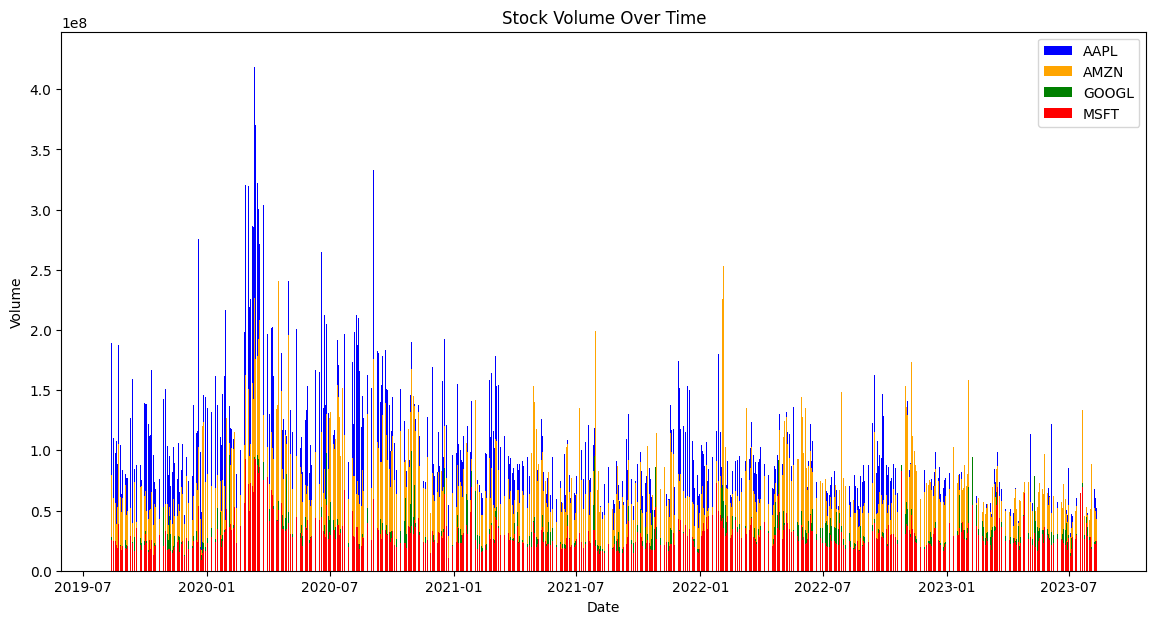

In [47]:
# Visualize stock volume
colors=['blue','orange','green','red']
visualize_stock_volume(stock_data_cleaned,colors)

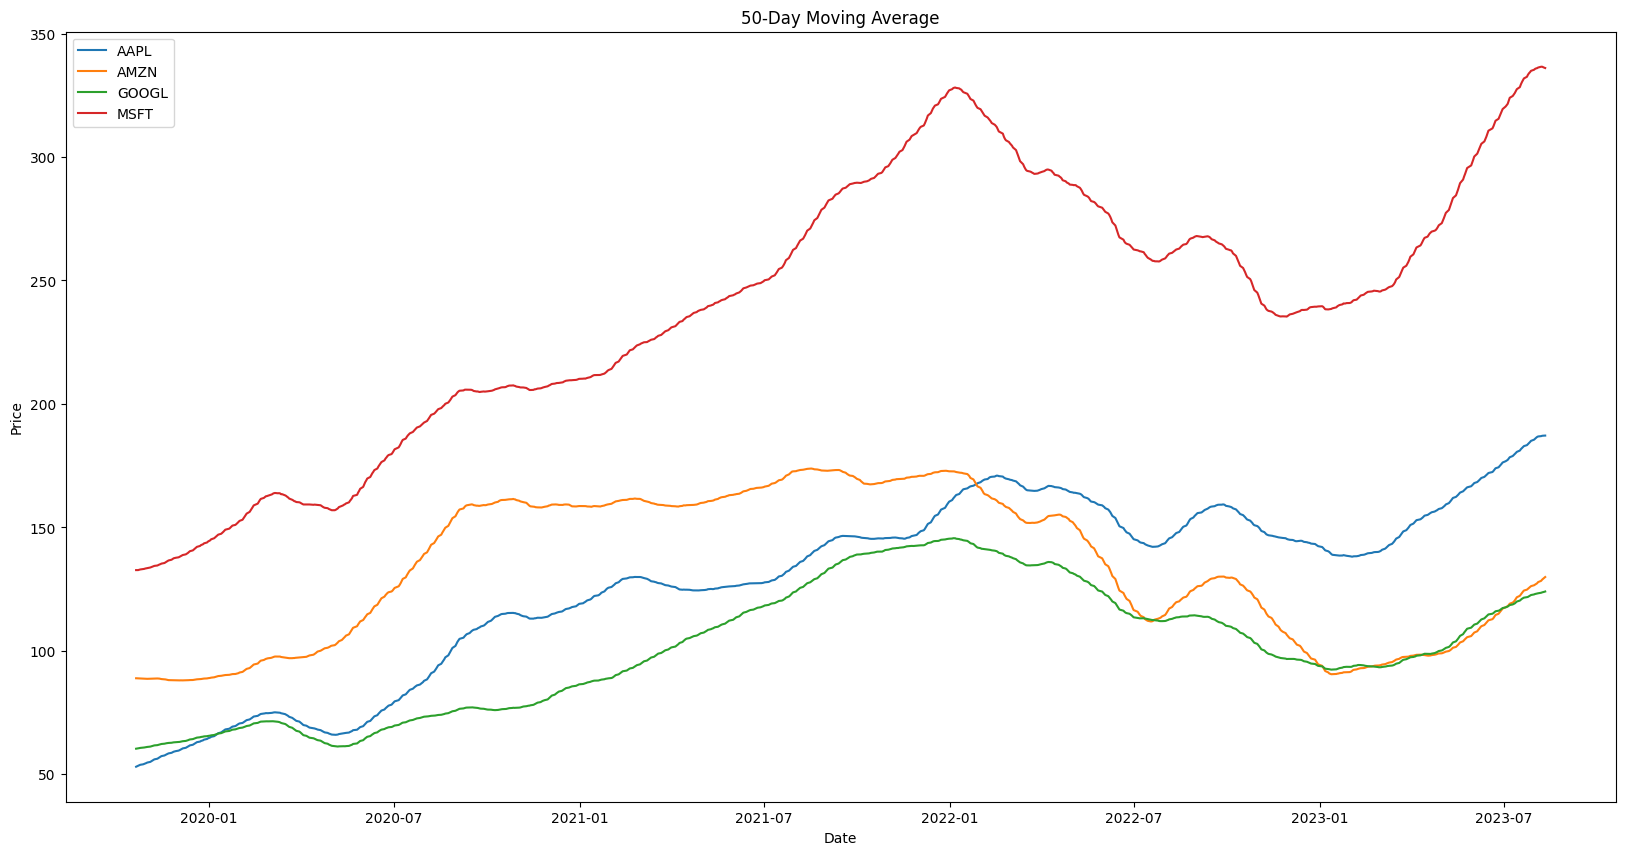

In [48]:

# Calculate and visualize 50-day moving average
moving_avg = calculate_moving_average(stock_data_cleaned, window=50)
plt.figure(figsize=(20, 10))
for ticker in moving_avg.columns:
    plt.plot(stock_data_cleaned.index, moving_avg[ticker], label=ticker)
plt.title('50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Average Daily Return:
AAPL     0.001512
AMZN     0.000707
GOOGL    0.001001
MSFT     0.001103
dtype: float64


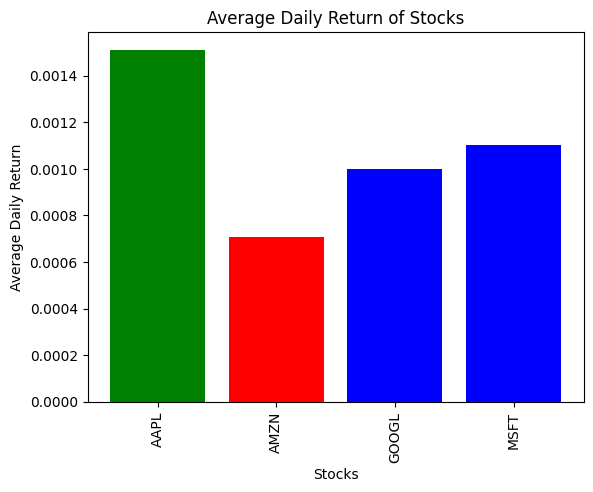

Maximum return: AAPL 0.0015115407632625816
Minimum return: AMZN 0.0007071649129690518


In [49]:

# Calculate and print daily return average
avg_daily_return = calculate_daily_return(stock_data_cleaned)
print('Average Daily Return:', avg_daily_return,sep='\n')

max_index = avg_daily_return.idxmax()
min_index = avg_daily_return.idxmin()

for stock_name, value in avg_daily_return.items():
    color = 'green' if stock_name == max_index else ('red' if stock_name == min_index else 'blue')
    plt.bar(stock_name, value, color=color)

plt.xlabel("Stocks")
plt.ylabel("Average Daily Return")
plt.title("Average Daily Return of Stocks")
plt.xticks(rotation=90)
plt.show()

print("Maximum return:",max_index,avg_daily_return.max())
print("Minimum return:",min_index,avg_daily_return.min())


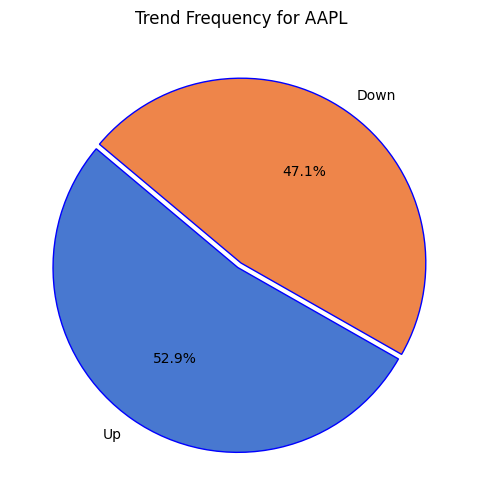

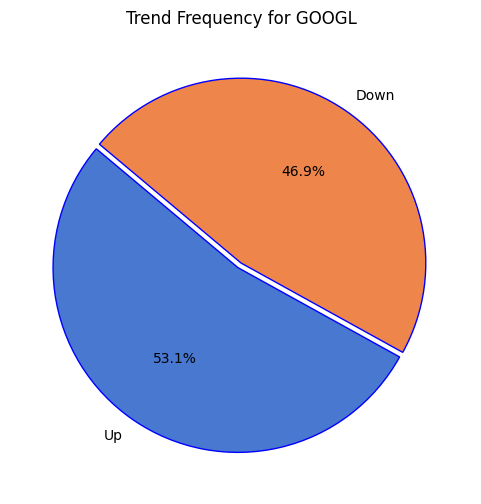

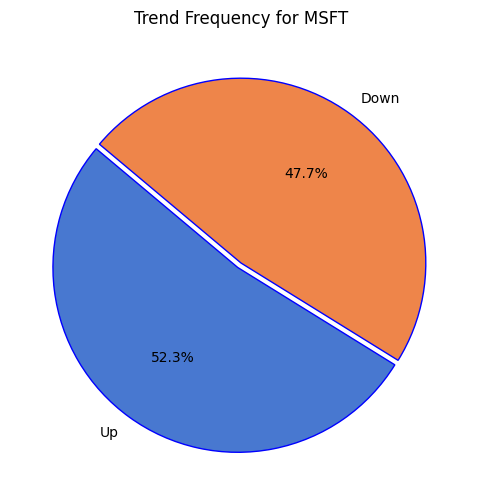

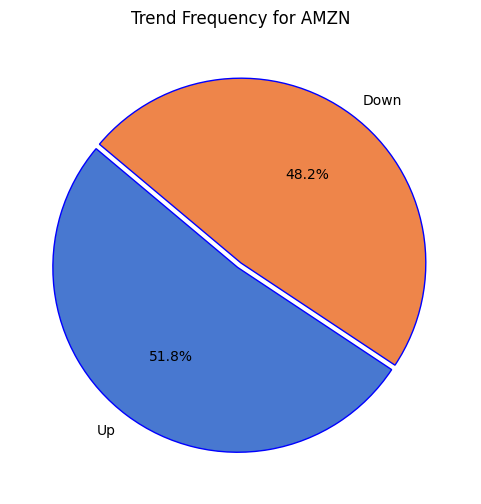

In [50]:

# Add 'Trend' column
stock_data_with_trend = add_trend_column(stock_data_cleaned)

# Visualize trend frequency for each stock
for ticker in stocks:
    visualize_trend_frequency(stock_data_with_trend, ticker)
    print('\n\n\n')


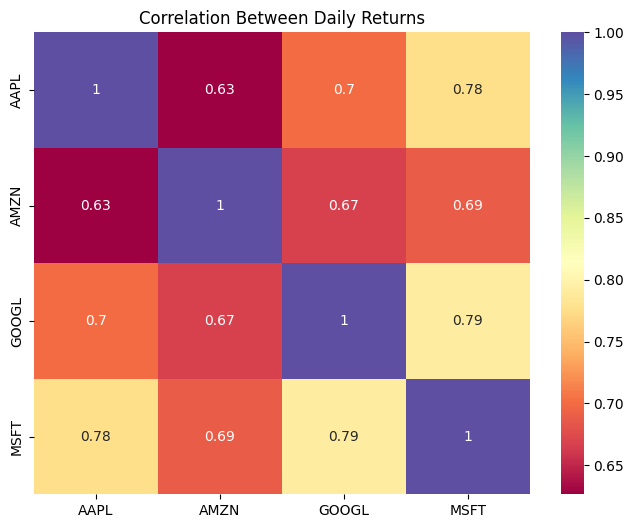

In [51]:

# Visualize correlation between daily returns
visualize_correlation(stock_data_cleaned)
